## Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import autokeras as ak

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/winequality-white_fixed.csv", index_col=0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Checking Data

<AxesSubplot:>

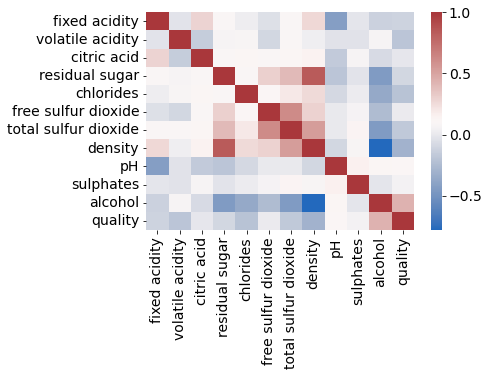

In [3]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [4]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667


## Breaking Data in X and y

In [5]:
X = df.iloc[:,:-1]

In [6]:
y = df.iloc[:,-1]

# Generating Models

In [7]:
# Using AutoKeras output to help us tune our parameters
# Can adjust hyperpameters, activation functions, and layer stucture based on our findings

auto_tune = ak.StructuredDataRegressor(max_trials=10, 
                                       overwrite=True,
                                       loss='mean_squared_error',
                                       output_dim=1,
                                       project_name='auto_keras'
                                       )

X_train, X_test, y_train, y_test = train_test_split(X, y)

auto_tune.fit(X_train, y_train, validation_split = 0.15, epochs = 10)
y_hat = auto_tune.predict(X_test)
print(auto_tune.evaluate(X_test, y_test))

auto_tune_mod = auto_tune.export_model()
print(auto_tune_mod.summary())


Trial 10 Complete [00h 00m 13s]
val_loss: 0.016570644453167915

Best val_loss So Far: 0.016570644453167915
Total elapsed time: 00h 02m 10s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
115/115 [==============================] - 1s 6ms/step - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 2/10
115/115 [==============================] - 1s 6ms/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 3/10
115/115 [==============================] - 1s 6ms/step - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 4/10
115/115 [==============================] - 1s 7ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 7/10
115/115 [==============================] - 1s 4ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 9/10
115/115 [==============================] - 1s 5ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 10/1

2022-04-02 19:29:25.051934: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./auto_keras/best_model/assets
39/39 [==============================] - 2s 9ms/step - loss: 0.0147 - mean_squared_error: 0.0147
[0.0147084416821599, 0.0147084416821599]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 11)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                       

In [8]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 50

# Defining batch size
bs = 32

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [9]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [10]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0213
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 6/50
123/123 [=============================

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


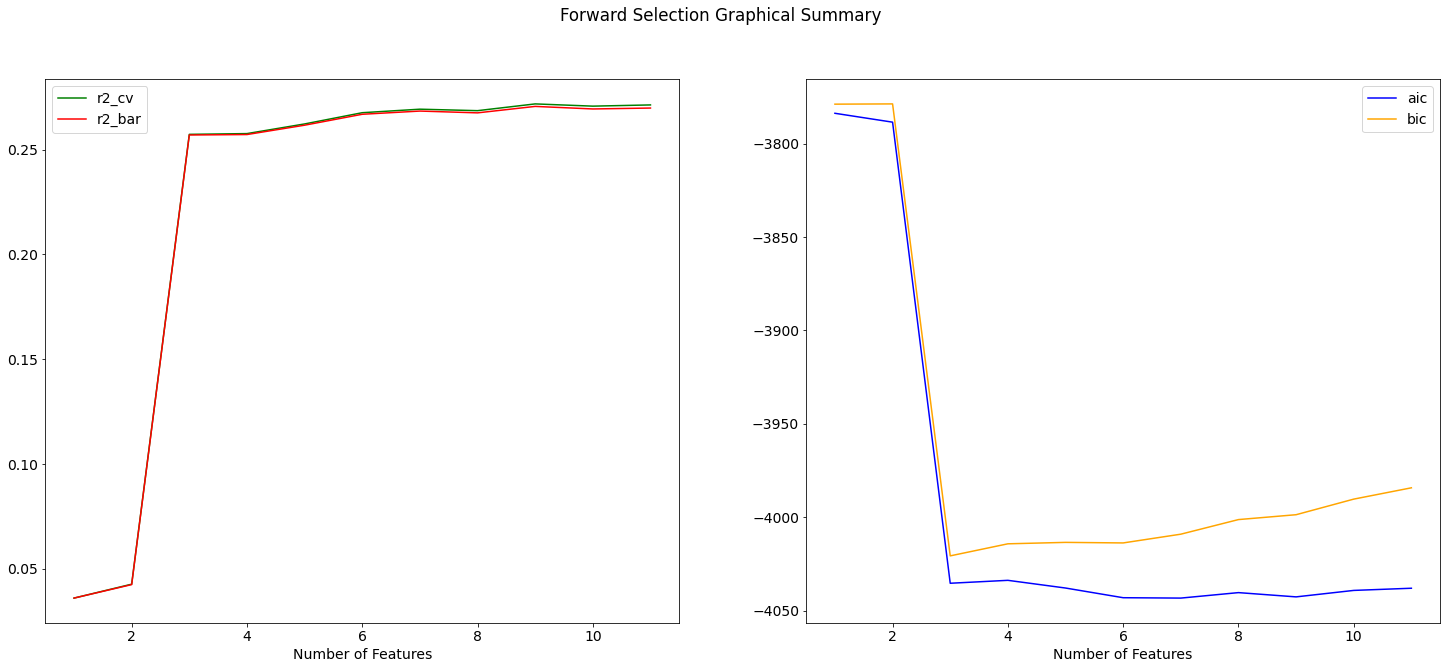

In [11]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [12]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [13]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 11)                132       
                                                                 
 dense_126 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0228
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 6/50
123/123 [==========================

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 11)                132       
                                                                 
 dense_136 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                       

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


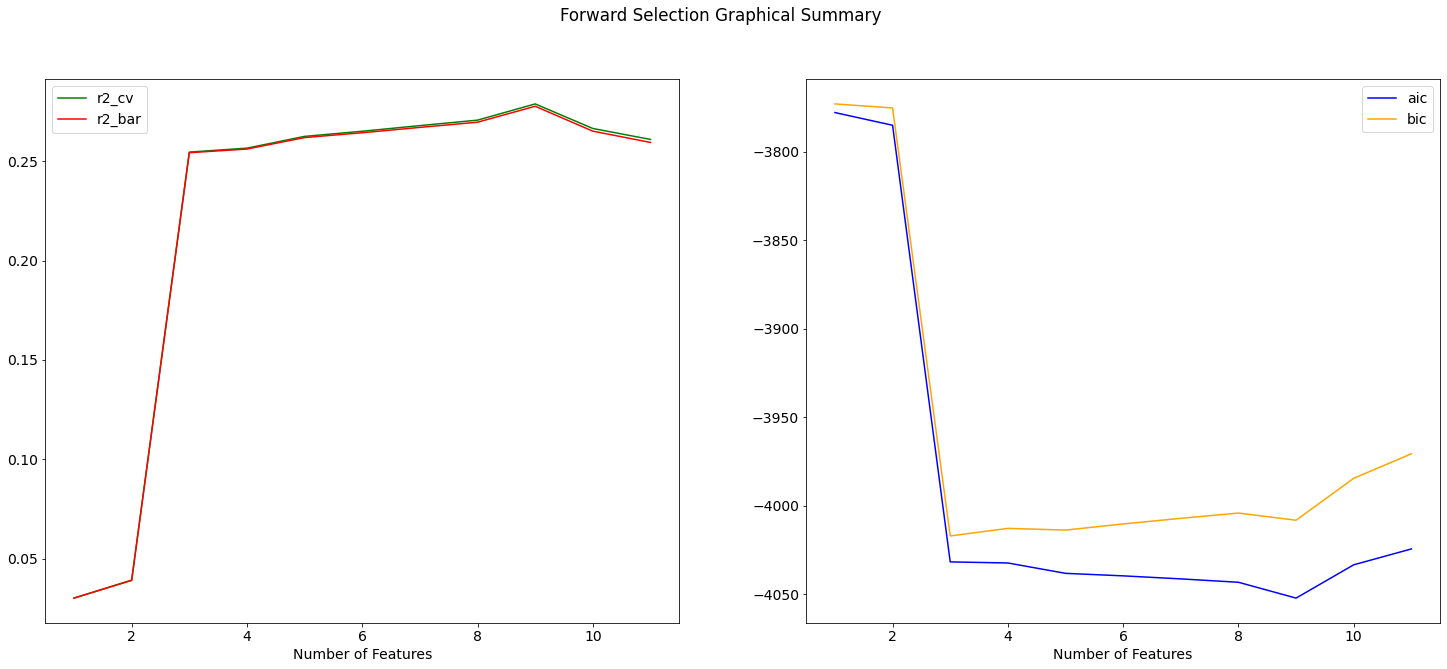

In [14]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [15]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'relu'

In [16]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_247 (Dense)           (None, 11)                132       
                                                                 
 dense_248 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0332
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 6/50
123/123 [=========================

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 11)                132       
                                                                 
 dense_258 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                      

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


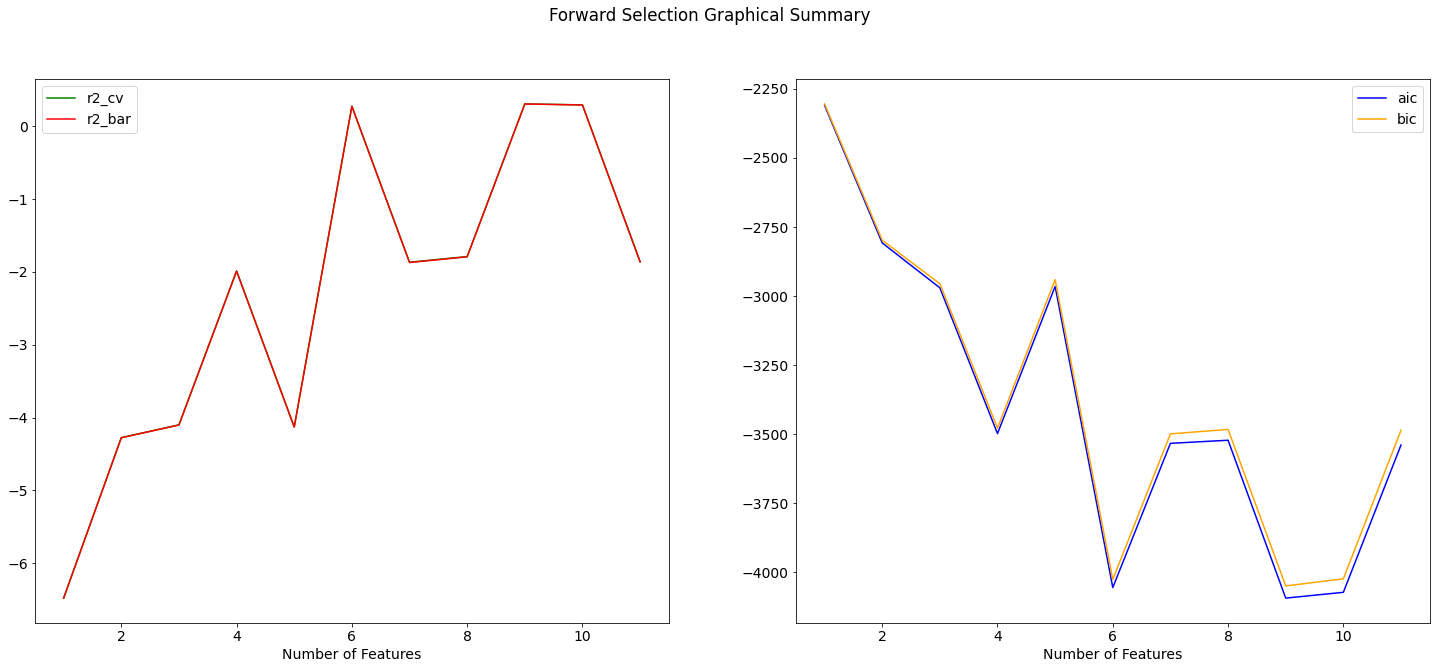

In [17]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [18]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [19]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 11)                132       
                                                                 
 dense_370 (Dense)           (None, 23)                276       
                                                                 
 dense_371 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0272
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0

Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 11)                132       
                                                                 
 dense_385 (Dense)           (None, 23)                276       
                                                                 
 dense_386 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


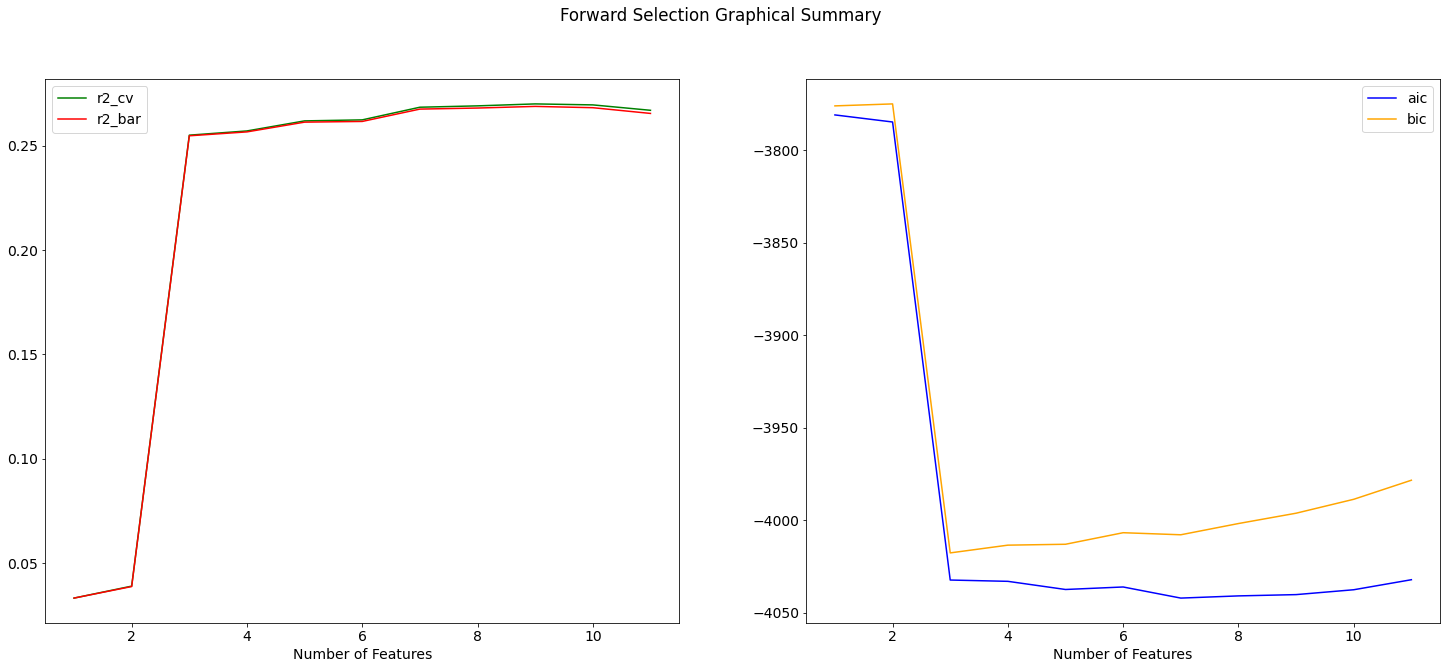

In [20]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [21]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [22]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_552 (Dense)           (None, 11)                132       
                                                                 
 dense_553 (Dense)           (None, 23)                276       
                                                                 
 dense_554 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0464
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0

Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_567 (Dense)           (None, 11)                132       
                                                                 
 dense_568 (Dense)           (None, 23)                276       
                                                                 
 dense_569 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


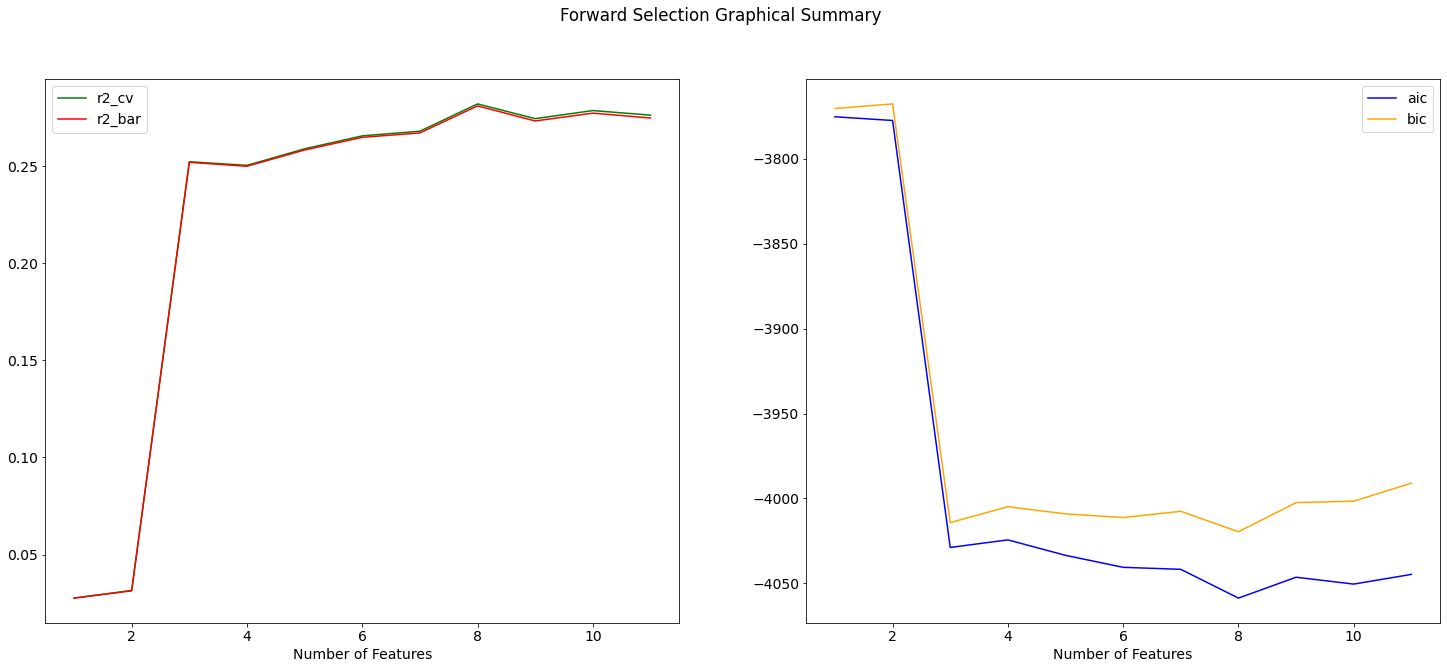

In [23]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [24]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'relu'

In [25]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_735 (Dense)           (None, 11)                132       
                                                                 
 dense_736 (Dense)           (None, 23)                276       
                                                                 
 dense_737 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0299
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 0

Model: "sequential_310"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_750 (Dense)           (None, 11)                132       
                                                                 
 dense_751 (Dense)           (None, 23)                276       
                                                                 
 dense_752 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


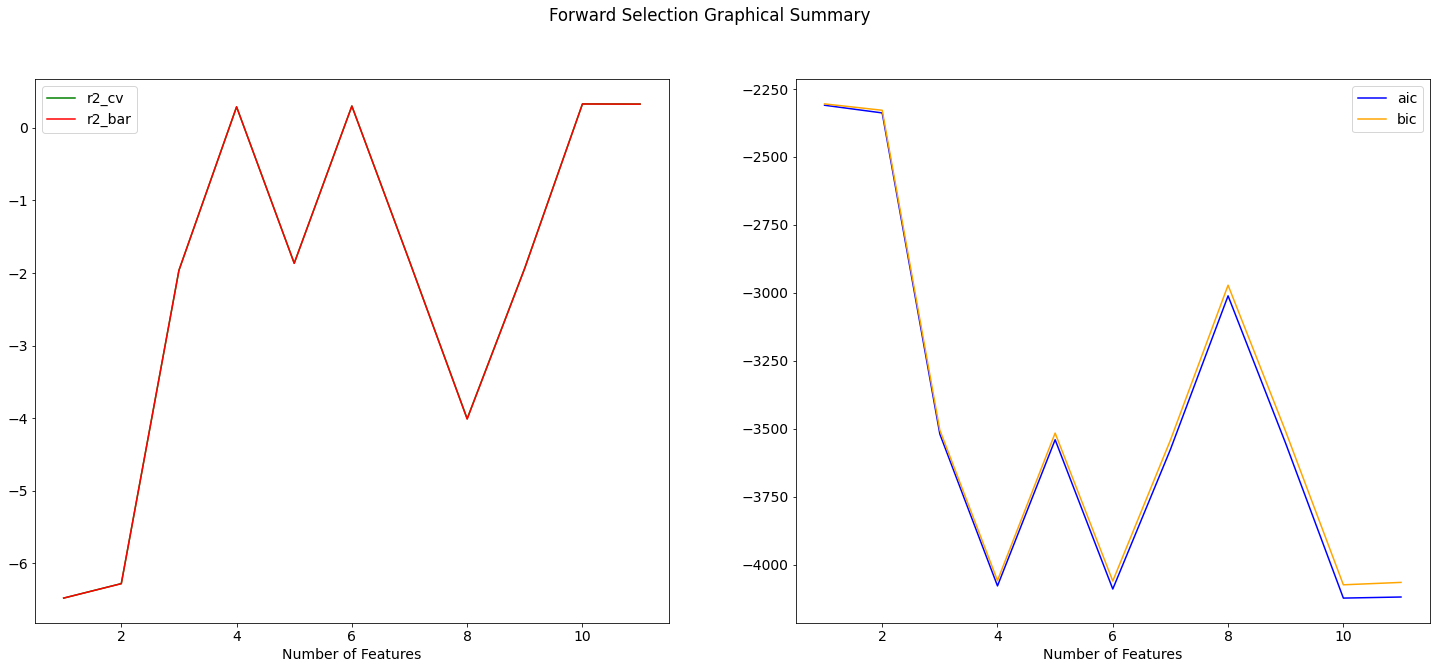

In [26]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 4 Layer Neural Networks

### Sigmoid Activation Function

In [27]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [28]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_366"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_918 (Dense)           (None, 11)                132       
                                                                 
 dense_919 (Dense)           (None, 23)                276       
                                                                 
 dense_920 (Dense)           (None, 12)                288       
                                                                 
 dense_921 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 3ms/step - loss: 0.0257
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 3/50
123/123 [====

Model: "sequential_371"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_938 (Dense)           (None, 11)                132       
                                                                 
 dense_939 (Dense)           (None, 23)                276       
                                                                 
 dense_940 (Dense)           (None, 12)                288       
                                                                 
 dense_941 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


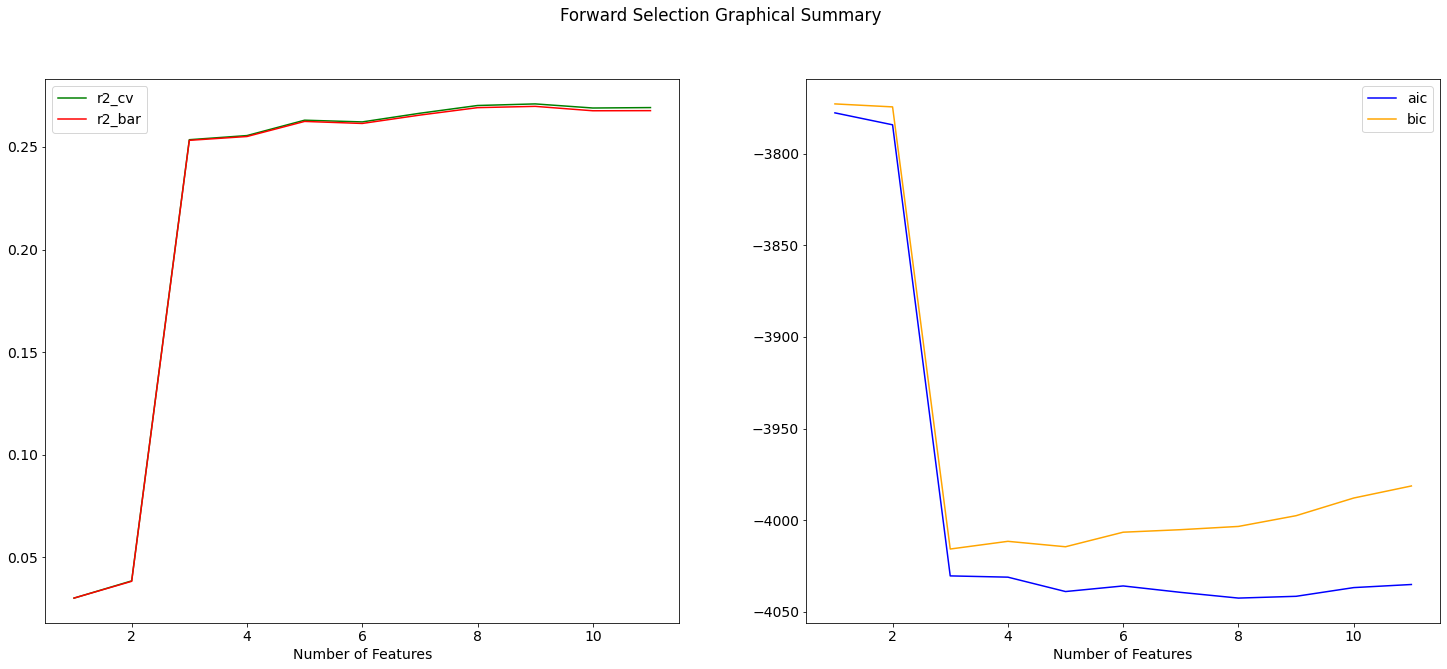

In [29]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [30]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [31]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_427"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1162 (Dense)          (None, 11)                132       
                                                                 
 dense_1163 (Dense)          (None, 23)                276       
                                                                 
 dense_1164 (Dense)          (None, 12)                288       
                                                                 
 dense_1165 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.0409
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 3/50
123/123 [====

Model: "sequential_432"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1182 (Dense)          (None, 11)                132       
                                                                 
 dense_1183 (Dense)          (None, 23)                276       
                                                                 
 dense_1184 (Dense)          (None, 12)                288       
                                                                 
 dense_1185 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


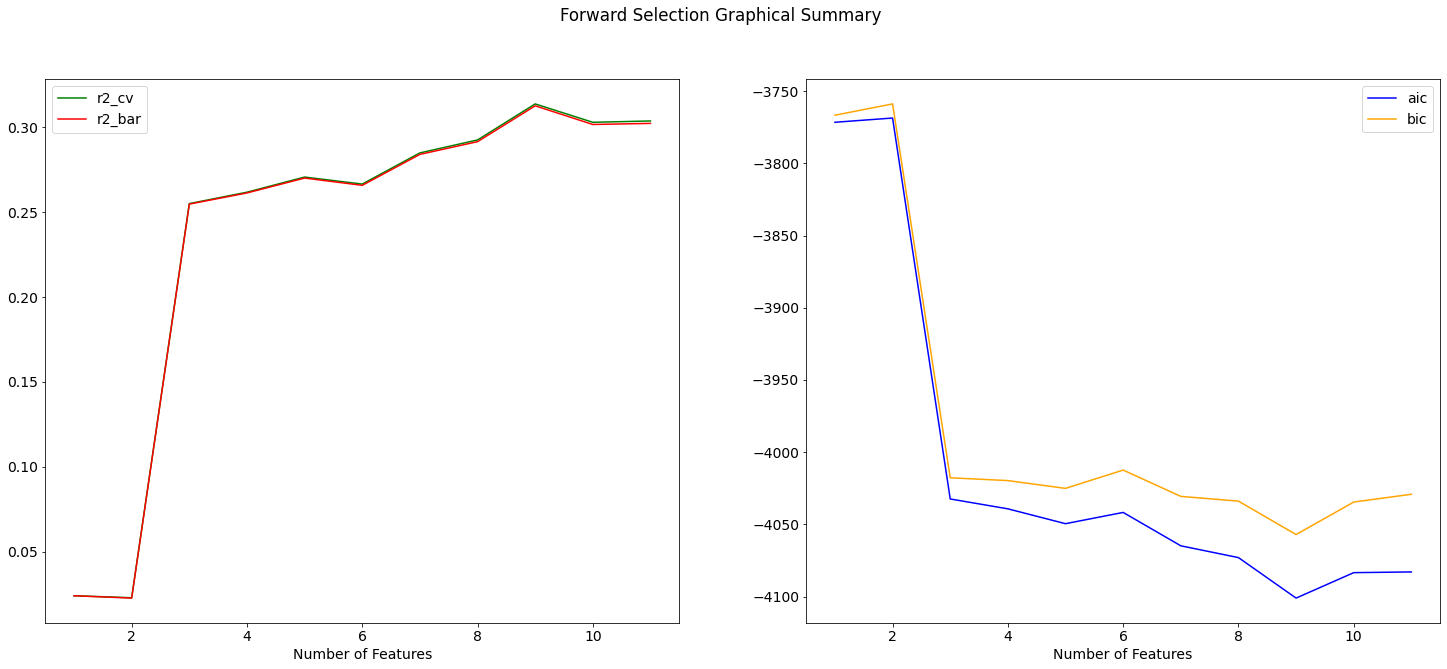

In [32]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [33]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'relu'

In [34]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_488"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1406 (Dense)          (None, 11)                132       
                                                                 
 dense_1407 (Dense)          (None, 23)                276       
                                                                 
 dense_1408 (Dense)          (None, 12)                288       
                                                                 
 dense_1409 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 2s 2ms/step - loss: 0.0339
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 3/50
123/123 [====

Model: "sequential_493"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1426 (Dense)          (None, 11)                132       
                                                                 
 dense_1427 (Dense)          (None, 23)                276       
                                                                 
 dense_1428 (Dense)          (None, 12)                288       
                                                                 
 dense_1429 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


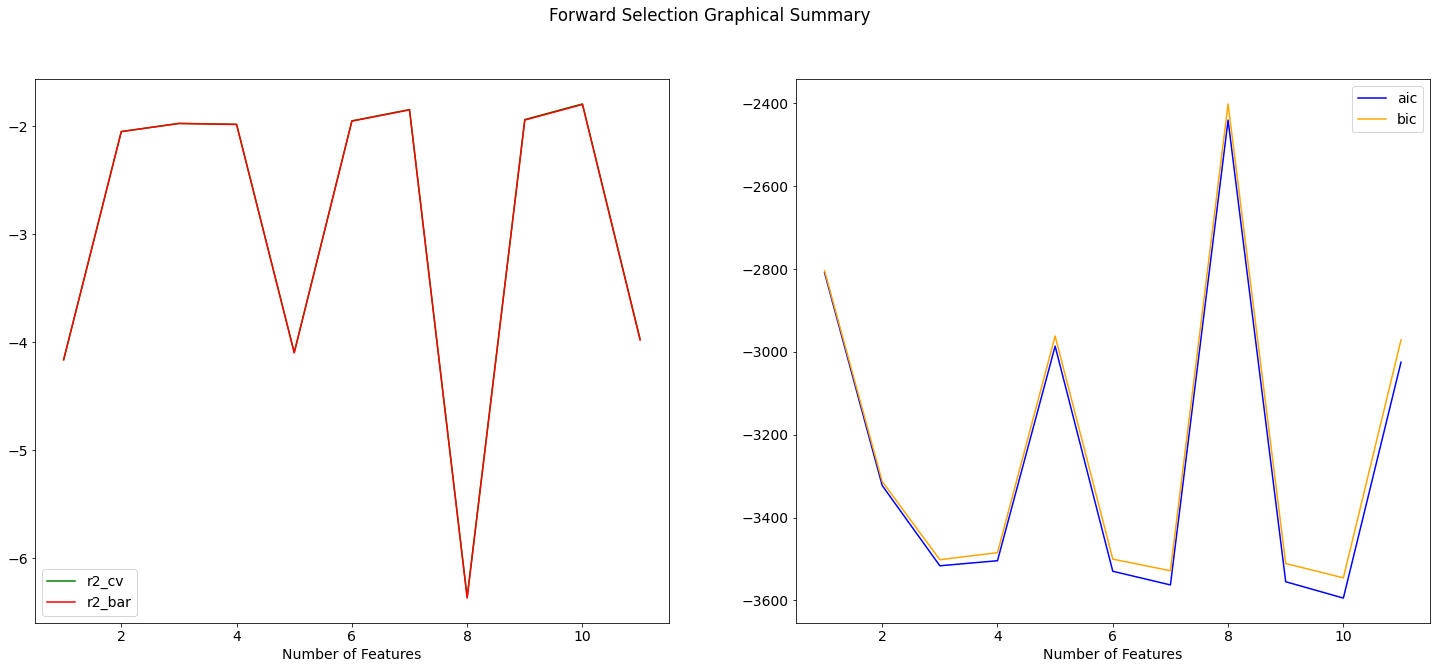

In [35]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)